# Word2Vec ile Vektör Görselleştirme

In [113]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

In [114]:
model=Word2Vec.load("Word2Vec.model")

words=list(model.wv.index_to_key) #modelimizin içindeki kelimeleri bir listede toplayalım.

In [115]:
#Veri setinde kelimelerin kaçar adet geçtiğini bulma

dfName=[]
dfCount=[]

for i in words:
    dfName.append(i)
    dfCount.append(model.wv.get_vecattr(i,"count")) #kelimeleri sayan fonksiyon


df=pd.DataFrame({"Kelimeler":dfName,"Sayıları":dfCount})
df.head()

,Kelimeler,Sayıları
0,dil,962
1,doğal,822
2,işle,733
3,yapay,304
4,zeka,269


In [116]:
df.sort_values(by="Sayıları",ascending=False)

,Kelimeler,Sayıları
0,dil,962
1,doğal,822
2,işle,733
6,iç,514
92,ben,421
...,...,...
4815,friday,1
4811,kandırıyorsunuz,1
4807,indirecek,1
4806,çerçev,1


In [117]:
#Kelimelerin birbirine benzer yapıda olanları tespit edip onları çıkarma işlemi

model.wv.most_similar(["doğal"])

[('dil', 0.9989464282989502),
 ('işle', 0.9985973238945007),
 ('yapay', 0.9985656142234802),
 ('il', 0.99854975938797),
 ('olarak', 0.9983938336372375),
 ('iç', 0.9983853697776794),
 ('gip', 0.9980071187019348),
 ('dah', 0.9979052543640137),
 ('zeka', 0.9978963732719421),
 ('alan', 0.9978577494621277)]

In [118]:
model.wv.most_similar(["dil"])

[('doğal', 0.9989463686943054),
 ('işle', 0.9988568425178528),
 ('iç', 0.9987912178039551),
 ('olarak', 0.9986765384674072),
 ('il', 0.9986740946769714),
 ('dah', 0.9985354542732239),
 ('yapay', 0.9984613656997681),
 ('işleme', 0.9983227849006653),
 ('zeka', 0.9981836080551147),
 ('var', 0.9980993866920471)]

In [119]:
model.wv.most_similar(["işle"])

[('dil', 0.9988568425178528),
 ('iç', 0.9987130761146545),
 ('doğal', 0.9985973238945007),
 ('olarak', 0.9985584616661072),
 ('il', 0.9985050559043884),
 ('yapay', 0.99835205078125),
 ('zeka', 0.998211145401001),
 ('alan', 0.998183012008667),
 ('var', 0.9980449080467224),
 ('dah', 0.9978764653205872)]

In [120]:
model.wv.similarity("doğal","dil") # iki kelime arasındaki benzerlik oranını bulma

0.9989463

### Görselleştirme İşlemi

In [121]:
dizi=np.empty((0,100),dtype="f") #boş bir dizi tanımladık.
dizi

array([], shape=(0, 100), dtype=float32)

In [122]:
word="işle"

wordLabels=[word]

closeWords=model.wv.most_similar(word) #kelimemize yakın anlamlı olan kelimeleri aldık.
closeWords

[('dil', 0.9988568425178528),
 ('iç', 0.9987130761146545),
 ('doğal', 0.9985973238945007),
 ('olarak', 0.9985584616661072),
 ('il', 0.9985050559043884),
 ('yapay', 0.99835205078125),
 ('zeka', 0.998211145401001),
 ('alan', 0.998183012008667),
 ('var', 0.9980449080467224),
 ('dah', 0.9978764653205872)]

In [123]:
dizi=np.append(dizi,np.array([model.wv.get_vector(word)]),axis=0) #seçtiğimiz kelimeye ait 100 boyutlu bir vektör oluşturduk.
dizi

array([[-0.01650319,  0.17454234,  0.04347034,  0.00468968,  0.05669516,
        -0.32304546,  0.08234888,  0.52634597, -0.13026765, -0.19836679,
        -0.00740159, -0.30147576, -0.10523038,  0.2350657 , -0.01248968,
        -0.21174973,  0.0765091 , -0.20336723,  0.01858927, -0.41857043,
         0.18785752,  0.02319181,  0.19778915, -0.1032308 ,  0.03421716,
         0.02383423, -0.06390107, -0.02981588, -0.24125907,  0.00607663,
         0.30869076,  0.01324359,  0.04944067, -0.2455858 , -0.10723009,
         0.18462023,  0.02969935, -0.14524011, -0.09054101, -0.33925366,
        -0.04685719, -0.24866617, -0.08691302, -0.02040916,  0.16929008,
        -0.10901131, -0.19151886, -0.0263764 ,  0.05356764,  0.1521805 ,
         0.13388589, -0.25202137, -0.17263022, -0.09266441, -0.09355922,
         0.10988598,  0.10631016, -0.05476775, -0.28374097,  0.06394625,
         0.05360571, -0.03185859,  0.06807026,  0.06561451, -0.26798934,
         0.37615272,  0.08139744,  0.12212434, -0.1

In [124]:
for wordScore in closeWords:
    wordVector=model.wv.get_vector(wordScore[0])
    wordLabels.append(wordScore[0])
    dizi=np.append(dizi,np.array([wordVector]),axis=0)

In [125]:
dizi #burdaki diziler çok boyutlu olduğundan 2 boyuta indirgemek için sklearn içinden tsne yi kullanacağız.

array([[-0.01650319,  0.17454234,  0.04347034, ..., -0.227908  ,
         0.04603723,  0.00349422],
       [-0.02283947,  0.20686916,  0.06785648, ..., -0.28754148,
         0.04506303,  0.02091914],
       [-0.00577023,  0.13098869,  0.03903186, ..., -0.1862301 ,
         0.02686271,  0.01428613],
       ...,
       [-0.02068031,  0.11179243,  0.03500495, ..., -0.12860739,
         0.02714509,  0.00185172],
       [-0.0151974 ,  0.0917749 ,  0.02790696, ..., -0.14503776,
         0.01572717,  0.00855551],
       [-0.00510252,  0.11669952,  0.04329467, ..., -0.16403812,
         0.02975238, -0.00032066]], dtype=float32)

In [126]:
from sklearn.manifold import TSNE

In [127]:
tsne=TSNE(n_components=2,random_state=42)
np.printoptions(suppress=True)
y=tsne.fit_transform(dizi)
y #diziyi 2 boyuta indirgedik.

c:\Users\burak\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\burak\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([[ -93.63255  , -159.14906  ],
       [-217.01442  ,  -65.74409  ],
       [ 143.24423  ,   60.75487  ],
       [  74.75805  ,  190.1368   ],
       [ -83.69165  ,  191.54616  ],
       [  48.06807  , -184.17189  ],
       [-181.71094  ,   86.2744   ],
       [ -89.38172  ,  -18.527739 ],
       [ 169.3635   ,  -82.425606 ],
       [  -5.7234974,   77.90541  ],
       [  35.67695  ,  -46.73273  ]], dtype=float32)

In [128]:
xCords=y[:,0]
xCords

array([ -93.63255  , -217.01442  ,  143.24423  ,   74.75805  ,
        -83.69165  ,   48.06807  , -181.71094  ,  -89.38172  ,
        169.3635   ,   -5.7234974,   35.67695  ], dtype=float32)

In [129]:
yCords=y[:,1]
yCords

array([-159.14906 ,  -65.74409 ,   60.75487 ,  190.1368  ,  191.54616 ,
       -184.17189 ,   86.2744  ,  -18.527739,  -82.425606,   77.90541 ,
        -46.73273 ], dtype=float32)

In [130]:
wordLabels

['işle',
 'dil',
 'iç',
 'doğal',
 'olarak',
 'il',
 'yapay',
 'zeka',
 'alan',
 'var',
 'dah']

In [131]:
#görselleştirme

import plotly.express as px

In [132]:
fig=px.scatter(x=xCords.tolist(),y=yCords.tolist(),text=wordLabels,size_max=100)

fig.update_layout(height=800,title_text="Word2Vec En Çok Benzeyen Kelimeler") #Tablonun başlık ve Boyutunu Ayarlama

fig.show()

In [133]:
#!pip install wordcloud

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

sentence=[]

for i in words:
    sentence.append(i)

text=" ".join(map(str,sentence))

In [140]:
wordCloud=WordCloud(width=3000,max_font_size=300,background_color="black").generate(text)

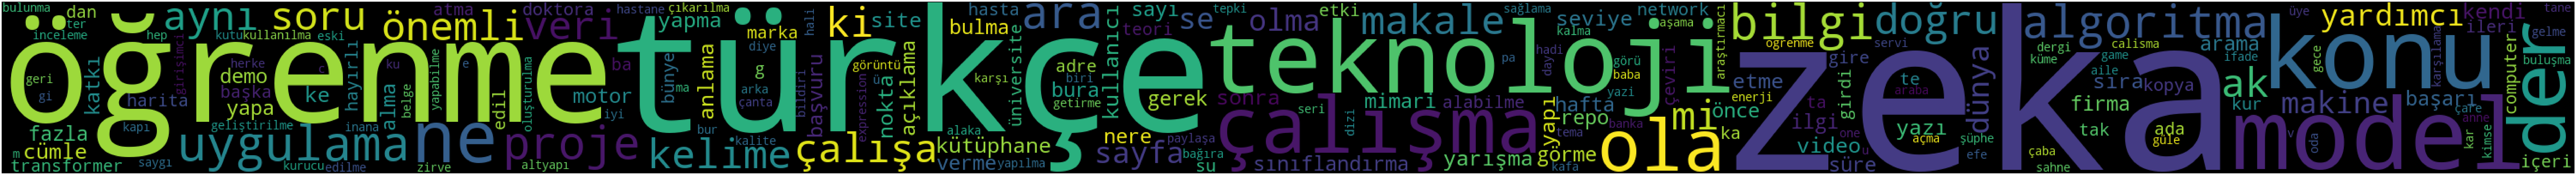

In [141]:
plt.figure(figsize=(200,300))
plt.imshow(wordCloud,interpolation=None)
plt.axis("off")
plt.show()
